In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('bmh')

# DATA CLEANING

In [2]:
df = pd.read_excel('reactivo_2.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df = df.drop(['Row ID','Order ID', 'Customer ID', 'Country', 'Postal Code', 'Product ID', 'Product Name'], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Ship Mode      9994 non-null   object        
 3   Customer Name  9994 non-null   object        
 4   Segment        9994 non-null   object        
 5   City           9994 non-null   object        
 6   State          9994 non-null   object        
 7   Region         9994 non-null   object        
 8   Category       9994 non-null   object        
 9   Sub-Category   9994 non-null   object        
 10  Sales          9994 non-null   float64       
 11  Quantity       9994 non-null   int64         
 12  Discount       9994 non-null   float64       
 13  Profit         9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(8)
memory usage: 1.1+

In [5]:
df.nunique()

Order Date       1237
Ship Date        1334
Ship Mode           4
Customer Name     793
Segment             3
City              531
State              49
Region              4
Category            3
Sub-Category       17
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [6]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# EDA

In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Shipping & Dates:

In [8]:
df['Shipping Days'] = df['Ship Date'] - df['Order Date']
df['Shipping Days'] = df['Shipping Days'].map(lambda x:x.days)

<Figure size 1080x360 with 0 Axes>

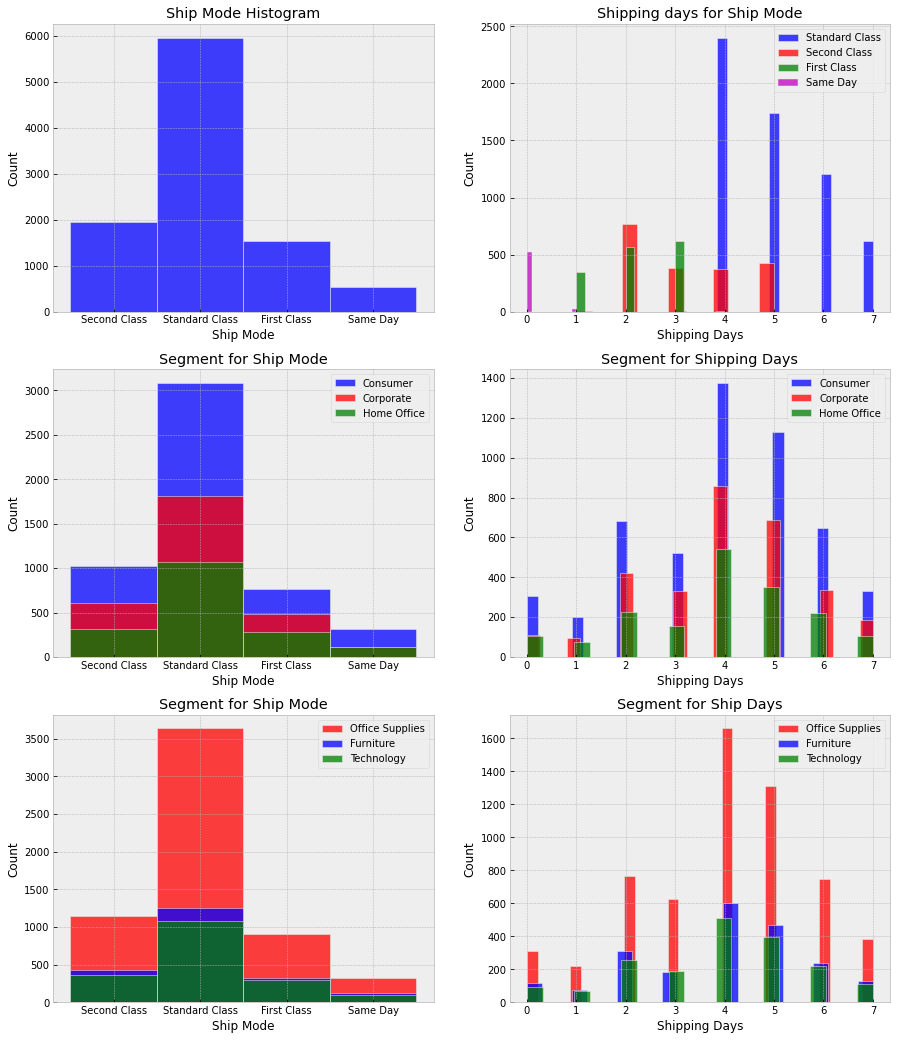

In [9]:
fig = plt.figure()
fig, axs = plt.subplots(3,2, figsize = (15,18))
sns.histplot(ax = axs[0][0], data=df, x="Ship Mode")
axs[0][0].set_title('Ship Mode Histogram')

sns.histplot(ax = axs[0][1], data = df[df['Ship Mode'] == 'Standard Class'], x = 'Shipping Days')
sns.histplot(ax = axs[0][1], data = df[df['Ship Mode'] == 'Second Class'], x = 'Shipping Days', color = 'r')
sns.histplot(ax = axs[0][1], data = df[df['Ship Mode'] == 'First Class'], x = 'Shipping Days', color = 'g')
sns.histplot(ax = axs[0][1], data = df[df['Ship Mode'] == 'Same Day'], x = 'Shipping Days', color = 'm')
axs[0][1].set_title('Shipping days for Ship Mode')
axs[0][1].legend(['Standard Class','Second Class','First Class','Same Day'])

sns.histplot(ax = axs[1][0], data = df[df['Segment'] == 'Consumer'], x = 'Ship Mode')
sns.histplot(ax = axs[1][0], data = df[df['Segment'] == 'Corporate'], x = 'Ship Mode', color = 'r')
sns.histplot(ax = axs[1][0], data = df[df['Segment'] == 'Home Office'], x = 'Ship Mode', color = 'g')
axs[1][0].set_title('Segment for Ship Mode')
axs[1][0].legend(['Consumer','Corporate','Home Office'])

sns.histplot(ax = axs[1][1], data = df[df['Segment'] == 'Consumer'], x = 'Shipping Days')
sns.histplot(ax = axs[1][1], data = df[df['Segment'] == 'Corporate'], x = 'Shipping Days', color = 'r')
sns.histplot(ax = axs[1][1], data = df[df['Segment'] == 'Home Office'], x = 'Shipping Days', color = 'g')
axs[1][1].set_title('Segment for Shipping Days')
axs[1][1].legend(['Consumer','Corporate','Home Office'])

sns.histplot(ax = axs[2][0],data = df[df['Category'] == 'Office Supplies'], x = 'Ship Mode', color = 'r')
sns.histplot(ax = axs[2][0],data = df[df['Category'] == 'Furniture'], x = 'Ship Mode')
sns.histplot(ax = axs[2][0],data = df[df['Category'] == 'Technology'], x = 'Ship Mode', color = 'g')
axs[2][0].set_title('Segment for Ship Mode')
axs[2][0].legend(['Office Supplies','Furniture','Technology'])

sns.histplot(ax = axs[2][1],data = df[df['Category'] == 'Office Supplies'], x = 'Shipping Days', color = 'r')
sns.histplot(ax = axs[2][1],data = df[df['Category'] == 'Furniture'], x = 'Shipping Days')
sns.histplot(ax = axs[2][1],data = df[df['Category'] == 'Technology'], x = 'Shipping Days', color = 'g')
axs[2][1].set_title('Segment for Ship Days')
axs[2][1].legend(['Office Supplies','Furniture','Technology'])

## Ventas:

In [10]:
df['Order Count'] = 1
bydate = df.copy()
bydate = df.groupby(by = 'Order Date').sum()
del bydate['Shipping Days']

Text(0.5, 1.0, 'Órdenes por año')

<Figure size 1080x360 with 0 Axes>

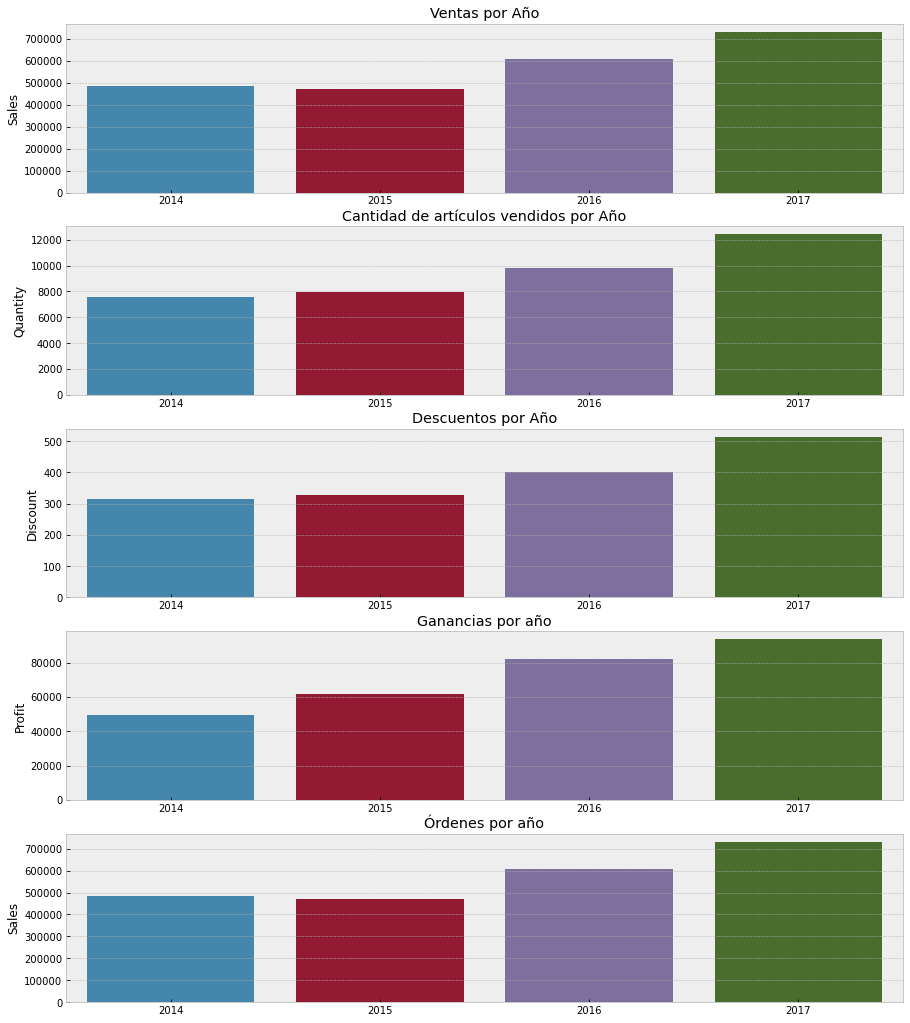

In [11]:
v14 = dict(bydate[(bydate.index > '2014-01-01')&(bydate.index<'2015-01-01')].sum())
v15 = dict(bydate[(bydate.index > '2015-01-01')&(bydate.index<'2016-01-01')].sum())
v16 = dict(bydate[(bydate.index > '2016-01-01')&(bydate.index<'2017-01-01')].sum())
v17 = dict(bydate[(bydate.index > '2017-01-01')&(bydate.index<'2018-01-01')].sum())
resumen_años = pd.DataFrame([v14,v15,v16,v17], index = [2014,2015,2016,2017])

fig = plt.figure()
fig, axs = plt.subplots(5,1, figsize = (15,18))
sns.barplot(ax = axs[0], data = resumen_años, x = resumen_años.index, y = 'Sales')
axs[0].set_title('Ventas por Año')
sns.barplot(ax = axs[1], data = resumen_años, x = resumen_años.index, y = 'Quantity')
axs[1].set_title('Cantidad de artículos vendidos por Año')
sns.barplot(ax = axs[2], data = resumen_años, x = resumen_años.index, y = 'Discount')
axs[2].set_title('Descuentos por Año')
sns.barplot(ax = axs[3], data = resumen_años, x = resumen_años.index, y = 'Profit')
axs[3].set_title('Ganancias por año')
sns.barplot(ax = axs[4], data = resumen_años, x = resumen_años.index, y = 'Sales')
axs[4].set_title('Órdenes por año')

Text(0.5, 0, '')

<Figure size 1080x360 with 0 Axes>

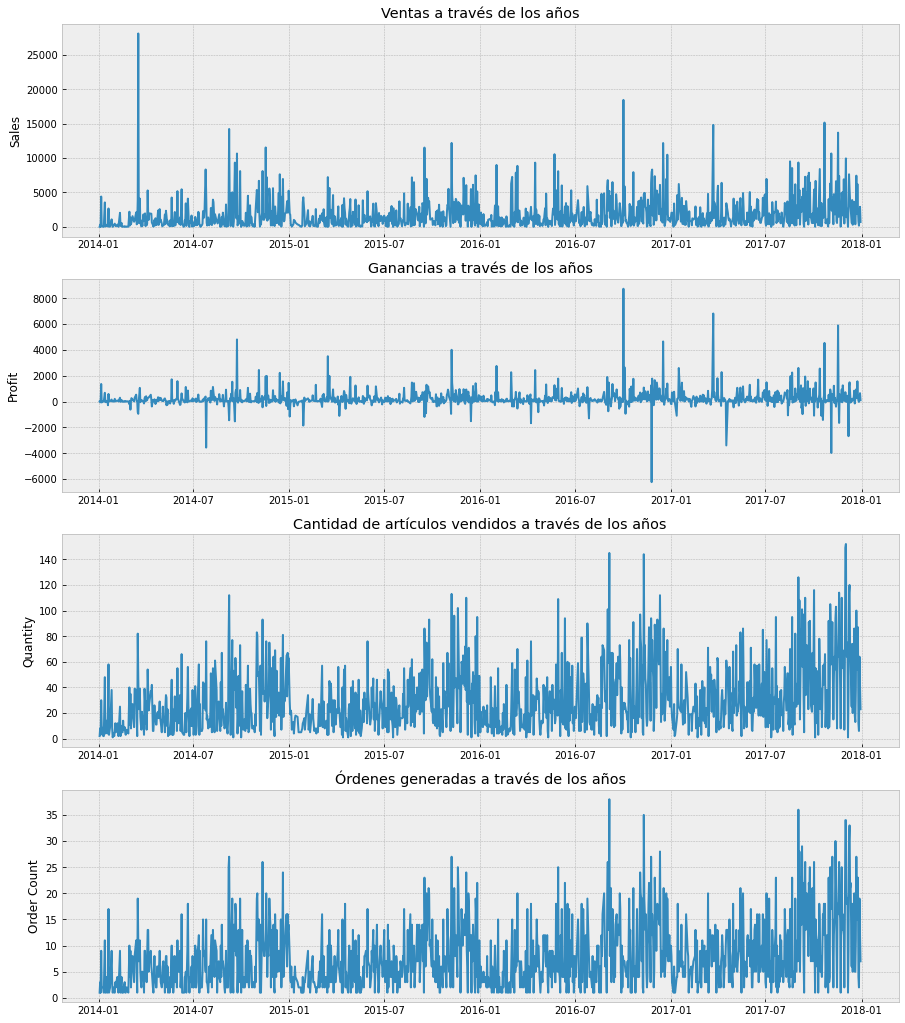

In [12]:
fig = plt.figure()
fig, axs = plt.subplots(4,1, figsize = (15,18))
sns.lineplot(ax = axs[0], data = bydate, x = bydate.index, y = 'Sales')
axs[0].set_title('Ventas a través de los años')
axs[0].set_xlabel('')
sns.lineplot(ax = axs[1], data = bydate, x = bydate.index, y = 'Profit')
axs[1].set_title('Ganancias a través de los años')
axs[1].set_xlabel('')
sns.lineplot(ax = axs[2], data = bydate, x = bydate.index, y = 'Quantity')
axs[2].set_title('Cantidad de artículos vendidos a través de los años')
axs[2].set_xlabel('')
sns.lineplot(ax = axs[3], data = bydate, x = bydate.index, y = 'Order Count')
axs[3].set_title('Órdenes generadas a través de los años')
axs[3].set_xlabel('')

## Ventas por estados:

In [13]:
bystate = df.copy()
bystate = bystate.groupby(by = 'State').sum()
del bystate['Shipping Days']
print(bystate.sort_values(by = 'Profit').head())
print(bystate.sort_values(by = 'Profit').tail())

                      Sales  Quantity  Discount      Profit  Order Count
State                                                                   
Texas           170188.0458      3724    364.64 -25729.3563          985
Ohio             78258.1360      1759    152.40 -16971.3766          469
Pennsylvania    116511.9140      2153    192.90 -15559.9603          587
Illinois         80166.1010      1845    191.90 -12607.8870          492
North Carolina   55603.1640       983     70.60  -7490.9122          249
                  Sales  Quantity  Discount      Profit  Order Count
State                                                               
Virginia     70636.7200       893       0.0  18597.9504          224
Michigan     76269.6140       946       1.8  24463.1876          255
Washington  138641.2700      1883      32.4  33402.6517          506
New York    310876.2710      4224      62.4  74038.5486         1128
California  457687.6315      7667     145.6  76381.3871         2001


In [14]:
prueba = df.copy()
prueba['Year'] = prueba['Order Date'].map(lambda x:x.year)
pt_prueba = pd.pivot_table(prueba, values = ['Sales','Profit','Discount','Quantity','Order Count'], index = 'State', columns = 'Year', aggfunc = 'sum')
pt_worst = pt_prueba[(pt_prueba.index == 'Texas')|(pt_prueba.index == 'Ohio')|(pt_prueba.index == 'Pennsylvania')]
pt_best = pt_prueba[(pt_prueba.index == 'California')|(pt_prueba.index == 'New York')|(pt_prueba.index == 'Washington')]

pt_worst

Discount                       Order Count                       \
Year             2014   2015   2016    2017        2014   2015   2016   2017   
State                                                                          
Ohio            31.20  28.00  41.20   52.00        93.0   83.0  132.0  161.0   
Pennsylvania    36.90  44.00  46.20   65.80       115.0  137.0  138.0  197.0   
Texas           80.16  78.44  85.22  120.82       217.0  203.0  248.0  317.0   

                 Profit                                  Quantity         \
Year               2014       2015       2016       2017     2014   2015   
State                                                                      
Ohio         -2131.0641 -5500.8902 -7602.8953 -1736.5270    357.0  302.0   
Pennsylvania -2361.8177 -3900.3451 -4184.9941 -5112.8034    429.0  497.0   
Texas        -9135.0140 -2516.1825 -5239.6549 -8838.5049    799.0  767.0   

                                   Sales                                    
Year            2016    2017        2014       2015       2016        2017  
State                                                                       
Ohio           497.0   603.0  14134.8500  16110.426  24748.010  23264.8500  
Pennsylvania   514.0   713.0  20246.1480  20510.816  33066.644  42688.3060  
Texas         1000.0  1158.0  50625.1766  34454.959  41686.152  43421.7582

In [15]:
pt_best

Discount                    Order Count                       \
Year           2014  2015   2016  2017        2014   2015   2016   2017   
State                                                                     
California    29.55  28.6  40.45  47.0       415.0  397.0  526.0  663.0   
New York      12.40  13.6  19.90  16.5       194.0  262.0  320.0  352.0   
Washington     6.20   4.0   8.60  13.6        94.0   75.0  122.0  215.0   

                Profit                                     Quantity          \
Year              2014        2015        2016        2017     2014    2015   
State                                                                         
California  12637.9491  14371.2630  20005.7161  29366.4589   1537.0  1498.0   
New York    13748.9448  19277.5826  16654.9495  24357.0717    746.0   966.0   
Washington   6607.2765   5328.7197   4209.8757  17256.7798    351.0   275.0   

                                Sales                                        
Year          2016    2017       2014        2015         2016         2017  
State                                                                        
California  1999.0  2633.0  91303.531  88443.8445  131551.9115  146388.3445  
New York    1193.0  1319.0  64788.487  80320.6870   71844.1020   93922.9950  
Washington   451.0   806.0  29871.576  23415.5140   19814.2840   65539.8960

# MODELLING

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [17]:
label = LabelEncoder()
df['Ship Mode'] = label.fit_transform(df['Ship Mode'])
df['Customer Name'] = label.fit_transform(df['Customer Name'])
df['Segment'] = label.fit_transform(df['Segment'])
df['City'] = label.fit_transform(df['City'])
df['State'] = label.fit_transform(df['State'])
df['Region'] = label.fit_transform(df['Region'])
df['Category'] = label.fit_transform(df['Category'])
df['Sub-Category'] = label.fit_transform(df['Sub-Category'])

In [18]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Days,Order Count
0,2016-11-08,2016-11-11,2,166,0,194,15,2,0,4,261.9600,2,0.00,41.9136,3,1
1,2016-11-08,2016-11-11,2,166,0,194,15,2,0,5,731.9400,3,0.00,219.5820,3,1
2,2016-06-12,2016-06-16,2,201,1,266,3,3,1,10,14.6200,2,0.00,6.8714,4,1
3,2015-10-11,2015-10-18,3,687,0,153,8,2,0,16,957.5775,5,0.45,-383.0310,7,1
4,2015-10-11,2015-10-18,3,687,0,153,8,2,1,14,22.3680,2,0.20,2.5164,7,1


In [19]:
X = df.loc[:, ~df.columns.isin(['Order Date', 'Ship Date','Shipping Days','Order Count'])]
X_norm = (X-X.min())/(X.max()-X.min())
X_norm.describe()

,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.745014,0.505826,0.329498,0.528221,0.465483,0.523547,0.486292,0.474403,0.010134,0.214583,0.195253,0.441910
std,0.366960,0.288263,0.381311,0.262562,0.323013,0.387443,0.314772,0.315714,0.027531,0.171162,0.258065,0.015617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.253788,0.000000,0.309434,0.083333,0.333333,0.500000,0.187500,0.000744,0.076923,0.000000,0.440115
50%,1.000000,0.512626,0.000000,0.556604,0.562500,0.333333,0.500000,0.562500,0.002387,0.153846,0.250000,0.440578
75%,1.000000,0.753788,0.500000,0.743396,0.750000,1.000000,0.500000,0.750000,0.009254,0.307692,0.250000,0.441957
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 100)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

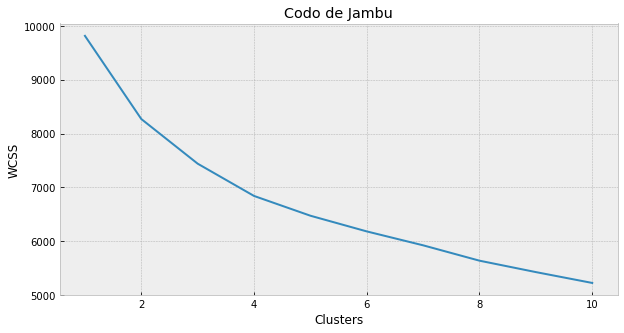

In [21]:
fig = plt.figure(figsize = (10,5))
plt.plot(range(1,11),wcss)
plt.title('Codo de Jambu')
plt.xlabel('Clusters')
plt.ylabel('WCSS')


In [22]:
clustering = KMeans(n_clusters = 4, max_iter = 100)
clustering.fit(X_norm)

KMeans(max_iter=100, n_clusters=4)

In [23]:
df['Cluster Label'] = clustering.labels_
df['Cluster Label'].value_counts()

0    3125
1    2573
3    2502
2    1794
Name: Cluster Label, dtype: int64

In [24]:
pca = PCA(n_components = 2)
pca_clients = pca.fit_transform(X_norm)
pca_clients_df = pd.DataFrame(data = pca_clients, columns = ['Componente_1','Componente_2'])
group_clients = pd.concat([pca_clients_df,df['Cluster Label']], axis = 1)

group_clients

,Componente_1,Componente_2,Cluster Label
0,-0.203856,-0.341106,0
1,-0.206344,-0.338857,0
2,-0.641134,0.177722,0
3,-0.143414,-0.351129,0
4,-0.202580,-0.335940,0
...,...,...,...
9989,-0.259078,-0.338036,0
9990,-0.560330,-0.355296,0
9991,-0.520097,-0.329031,0
9992,-0.568292,-0.336634,0


Text(0.5, 1.0, 'Clustering')

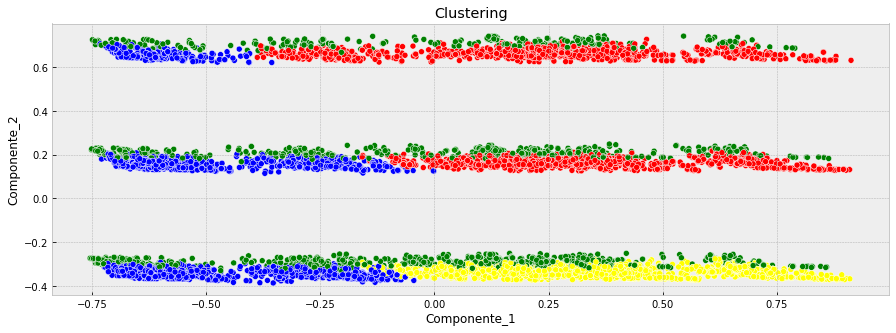

In [25]:
fig = plt.figure()
color_theme = np.array(['blue','red','green','yellow'])
sns.scatterplot(x = group_clients.Componente_1, y = group_clients.Componente_2, c = color_theme[group_clients['Cluster Label']])
plt.title('Clustering')